# Assignment 6: Lighting Estimation

MIDS W281: Computer Vision

## Recommended Libraries

In [22]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

![Hybrid Teaser](images/sphere.png)

 ### Overview
Lighting estimation is critical for many computer vision applications, and demonstrates a common use of least squares operations on pixel values. Accurate estimation of the lighting environment under which an image was captured can be used for image forensics, image re-lighting, 3D surface modeling, and compositing images with rendered objects, and many other techniques. For this assignment we will compute the lighting direction for a simple toy problem consisting of a sphere with faceted edges.

Consider the illuminated sphere shown above. If, as in this case, the light illuminating the sphere is distant and the sphere is a Lambertian surface, the amount of light $I$ that strikes any point ($X,Y,Z$) on the sphere's surface is equal to the dot product between the 3-D surface normal $N$ at ($X,Y,Z$) and the single 3-D vector $L$ which specifies the direction to the light source. In this assignment, you will estimate the direction to the light $L$ using least squares. You can assume that there is only one light source in the scene and there is no ambient light.

### Description

1. Write a Python code to load the given 3-D [$X$-](X.npy), [$Y$-](Y.npy), and [$Z$-](Z.npy) coordinates of the sphere and the corresponding illumination [$I$](I.npy). After loading the files you will have four 41 x 41 matrices corresponding to the illumination $I$ and the $X$-, $Y$-, and $Z$- coordinates of the sphere. That is, for any $u$ and $v$ between 1 and 41, the illumination on the sphere's surface at ($X_{u,v},Y_{u,v},Z_{u,v}$) is $I_{u,v}$. Display this sphere using the `plot_surface` method in Python. Set the color values so that the displayed sphere looks like the above image without the $L$ and $N$ arrows.  
&nbsp;

2. For each ($X,Y,Z$) on the sphere's surface, determine the surface normal $N$. The surface normal at any point on the sphere is a vector from the sphere origin to the point. Since the sphere is centered at the origin, this is a simple calculation. The surface normal should be specified as a unit vector.  
&nbsp;  

3. Using least-squares, estimate the lighting (a 3-D vector). Your solution should create an over constrained system of linear equations in the surface normal and illumination at each point ($X,Y,Z$) on the sphere's surface that is not in shadow (i.e. intensity is greater than zero). Your solution for the light vector $L$ is determined by solving this system of linear equations using least-squares.   
&nbsp;

**Do not use pseudo inverse functions like `numpy.linalg.pinv` or least squares functions `numpy.linalg.lstsq`.**

### Deliverables:

- Python code for computing the sphere normals and the light direction
- A plot displaying the 3-D sphere
- The 3-D direction of the light source

#### Create your functions

In [23]:
def plot_save_sphere(X,Y,Z,C,out_file):
    # write a function that takes the 
    # X,Y,Z and I NumPy array files as arguments,
    # plots the sphere,
    # then saves the figure to the out_file
    
    # display the sphere
    

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X,Y,Z, facecolors = C)
    # ax.grid(False)
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([]) 
    ax.set_xlabel("X", labelpad=0)
    ax.set_ylabel("Y", labelpad=0)
    ax.set_zlabel("Z", labelpad=0)
    ax.set_box_aspect([1.0, 1.0, 1.0])
    
    # plot and save the deliverable 
    plt.title('Plot the Sphere')
    plt.tight_layout(pad=5.08, h_pad=None, w_pad=None, rect=None)
    plt.savefig(out_file, bbox_inches='tight')
    plt.show()

    pass

def compute_normals(X,Y,Z):
    
    N = np.zeros((41*41, 3)) # your code should fill in the values for sphere normals
    
    # write a function that takes the 
    # X,Y,Z array files as arguments,
    # each input is of size (41, 41)
    # output N of size (41*41, 3)
    
    # TODO: vectorize the inputs to (41*41, 1)
    X = X.flatten()[:,np.newaxis]
    Y = Y.flatten()[:,np.newaxis]
    Z = Z.flatten()[:,np.newaxis]
    # TODO compute the normal at each point on the sphere
    N_normal = np.hstack([X,Y,Z])
    # TODO calculate the 2-norm of each normal
    N_2_norm = np.sqrt(N_normal[:,0]**2 + N_normal[:,1]**2 + N_normal[:,2]**2)[:,np.newaxis]
    # TODO divide each Normal by its norm
    N = N_normal / N_2_norm
    
    return N

#### Run your code

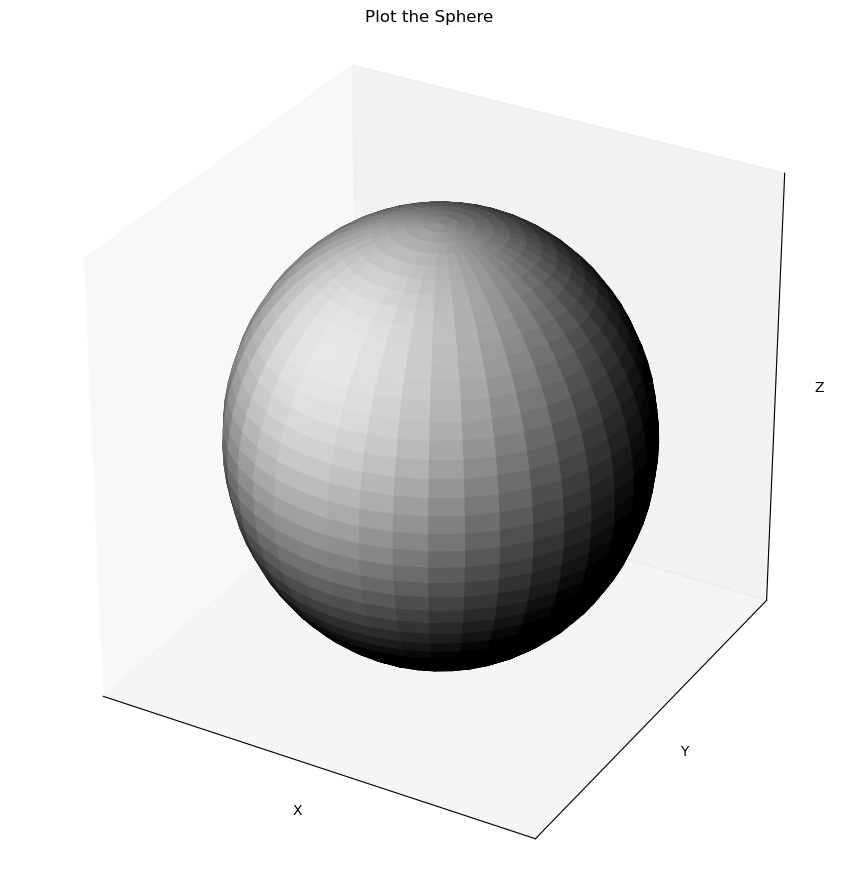

In [24]:
# load the npy and plot the sphere
X = np.load('X.npy')
Y = np.load('Y.npy')
Z = np.load('Z.npy')
I = np.load('I.npy')

# plot the sphere
plot_save_sphere(X,Y,Z, np.concatenate((I[:,:,np.newaxis],
                                        I[:,:,np.newaxis],
                                        I[:,:,np.newaxis]), axis=2), 'temp.png')


N = compute_normals(X,Y,Z)

#### Calculate and print the 3D direction of light source

In [25]:
# TODO calculate light direction using least squares
# vectorize I 
# consider only those points which are not in shadow
# solve for the light direction using least squares, remember I = N . l where l is the light direction

N_flat = N.reshape(-1, 3)
I_flat = I.flatten()
# Consider only points not in shadow (intensity > 0)
valid_indices = np.where(I_flat > 0)[0]
N_valid = N_flat[valid_indices]
I_valid = I_flat[valid_indices]
# Perform QR decomposition
Q, R = np.linalg.qr(N_valid)
# Solve the least squares problem using QR decomposition
l = np.linalg.solve(R, Q.T @ I_valid[:, np.newaxis])

# print the light direction
print(l)

[[ 0.00596716]
 [-0.70706699]
 [ 0.70705375]]
